In [ ]:
import os
import matplotlib.pyplot as plt

# OUR LIBRARIES / FUNCTIONS
from ImageLoader import load_image
from StarDetector import plot_detected_stars, find_stars, save_as_text_file
from StarMatching import estimate_transformation, get_star_matches, plot_matches

In [2]:
directory_path = "Ex1_test_101/"
file_names = os.listdir(directory_path)  # Get the list of files in the directory

file_path_combinations = []
for f1 in file_names:
    for f2 in file_names:
        file_path_combinations.append((os.path.join(directory_path, f1),
                                       os.path.join(directory_path, f2)))

Loaded images...
Finding feature points...
	Image1 number of feature points found: 37
	Image2 number of feature points found: 37
Computing matches...


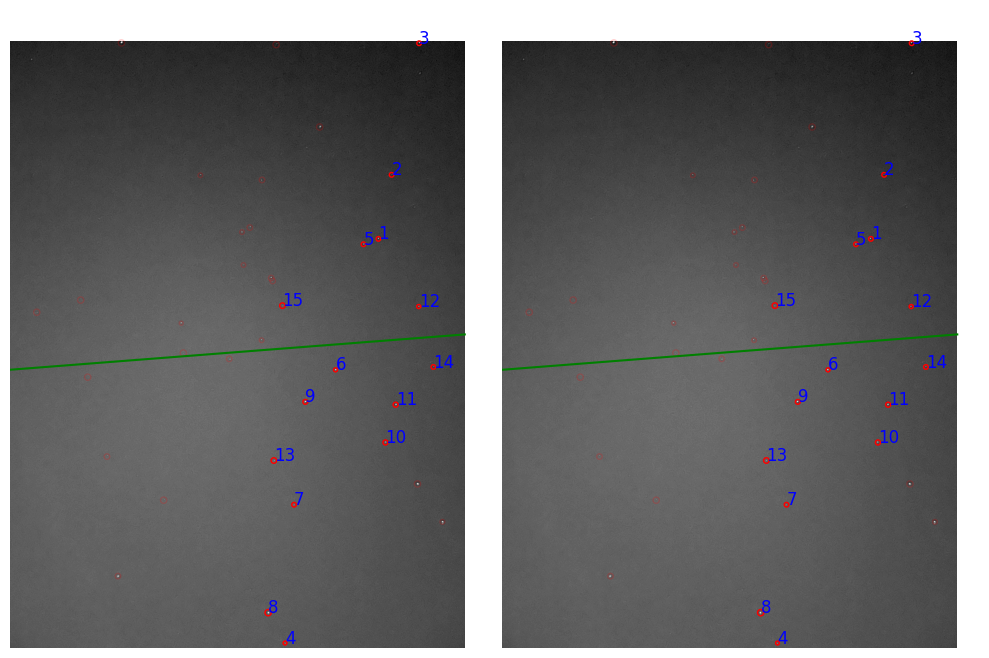

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 37
	Image2 number of feature points found: 37
Computing matches...


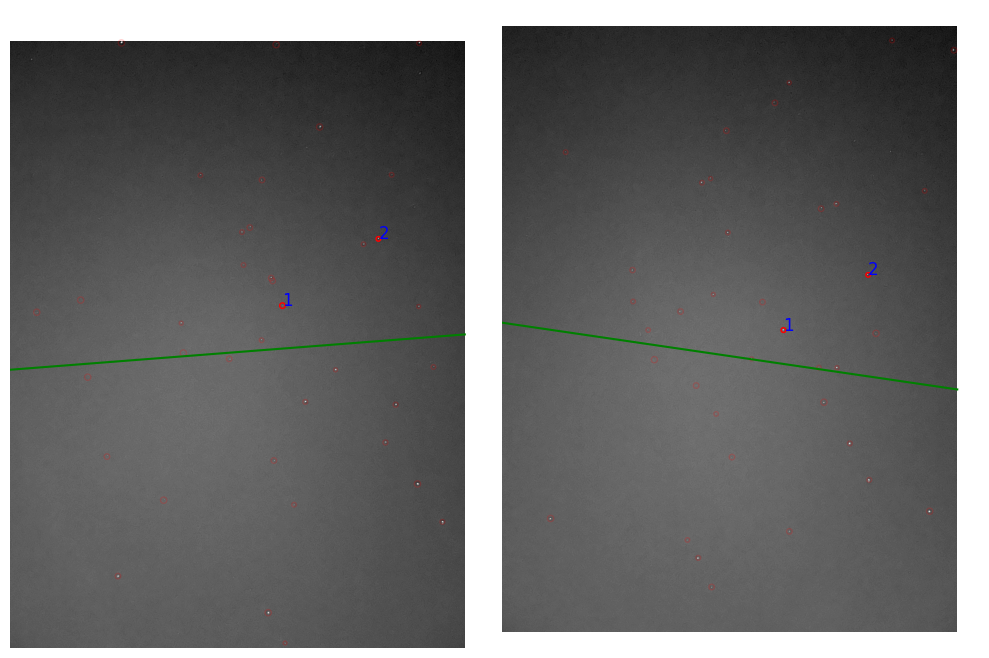

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 37
	Image2 number of feature points found: 207
Computing matches...


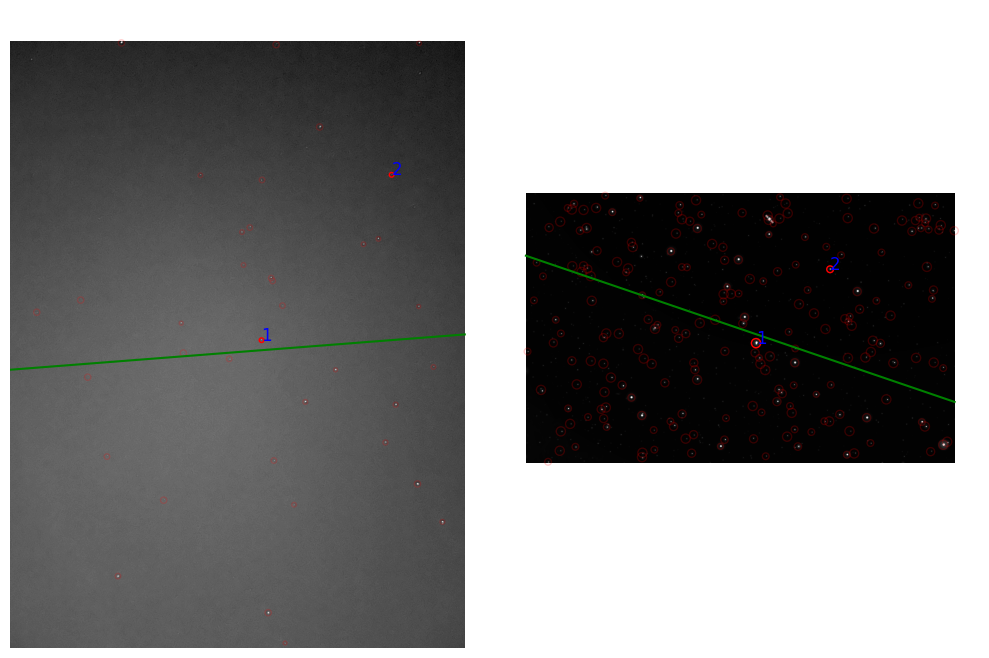

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 37
	Image2 number of feature points found: 212
Computing matches...


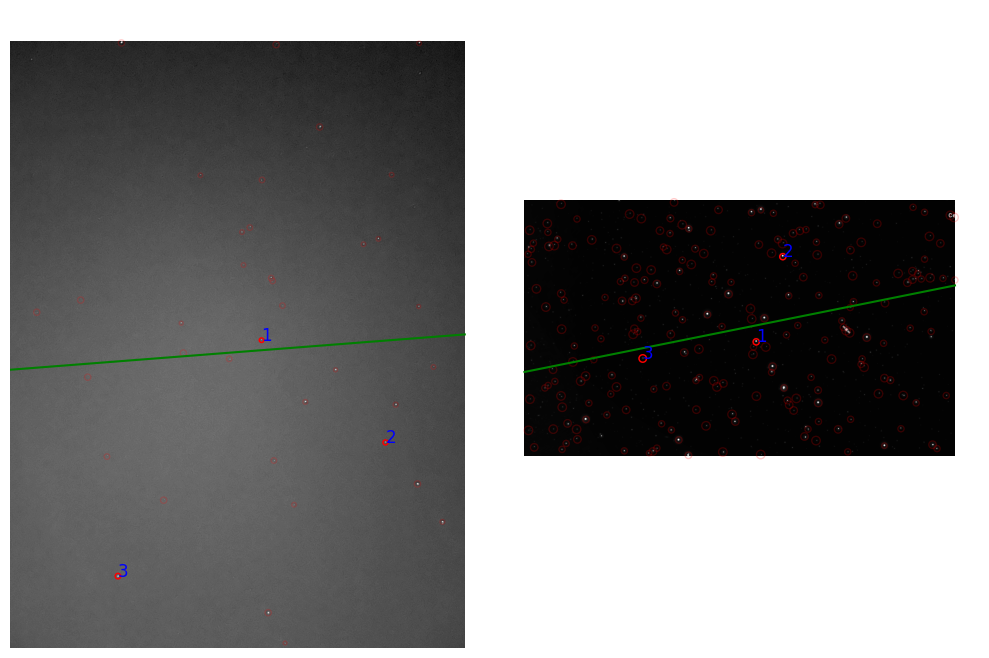

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 37
	Image2 number of feature points found: 37
Computing matches...


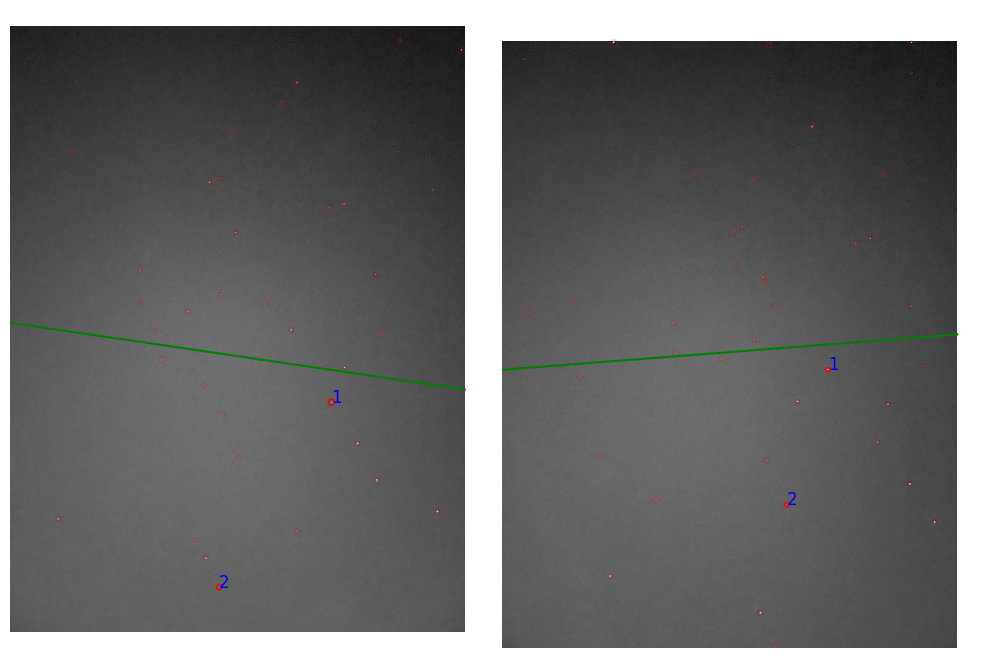

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 37
	Image2 number of feature points found: 37
Computing matches...


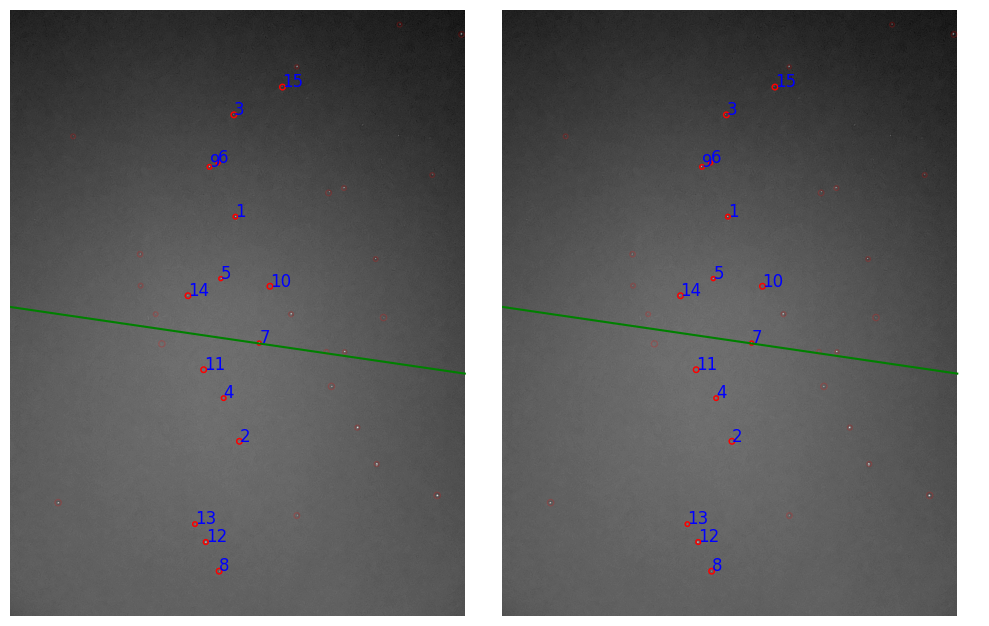

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 37
	Image2 number of feature points found: 207
Computing matches...


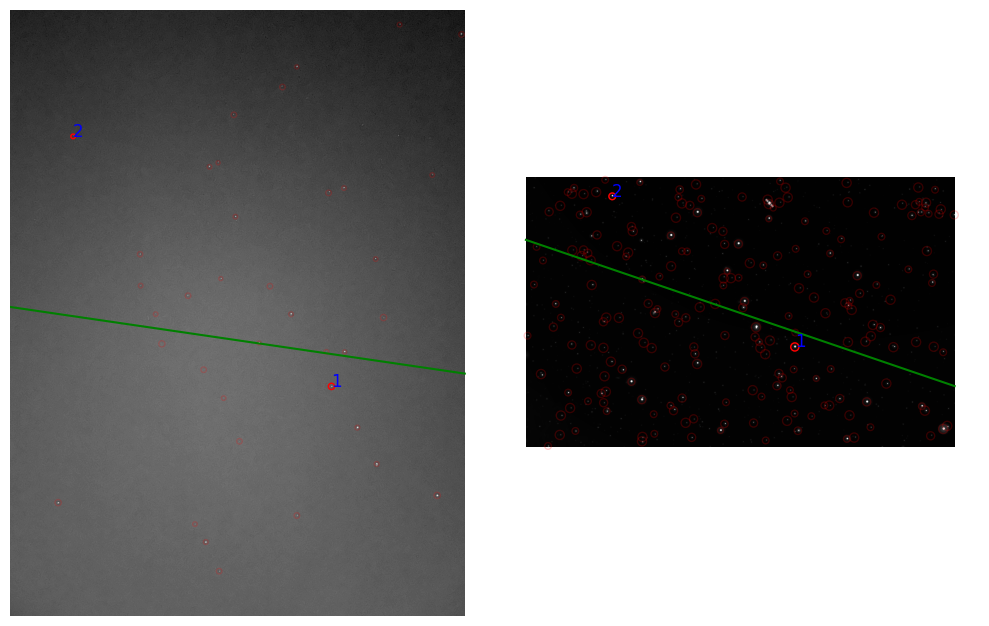

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 37
	Image2 number of feature points found: 212
Computing matches...


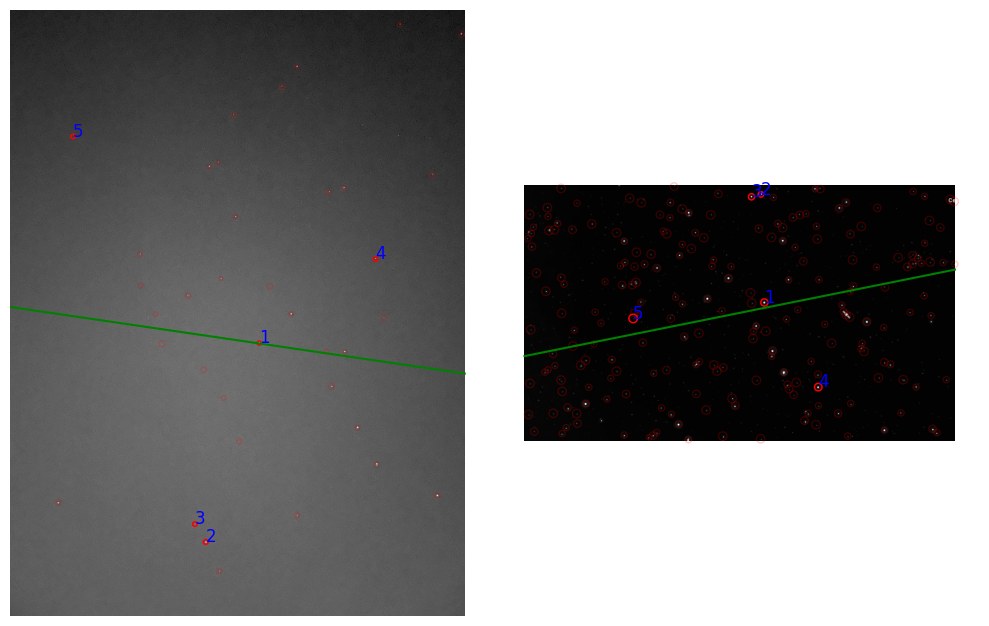

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 207
	Image2 number of feature points found: 37
Computing matches...


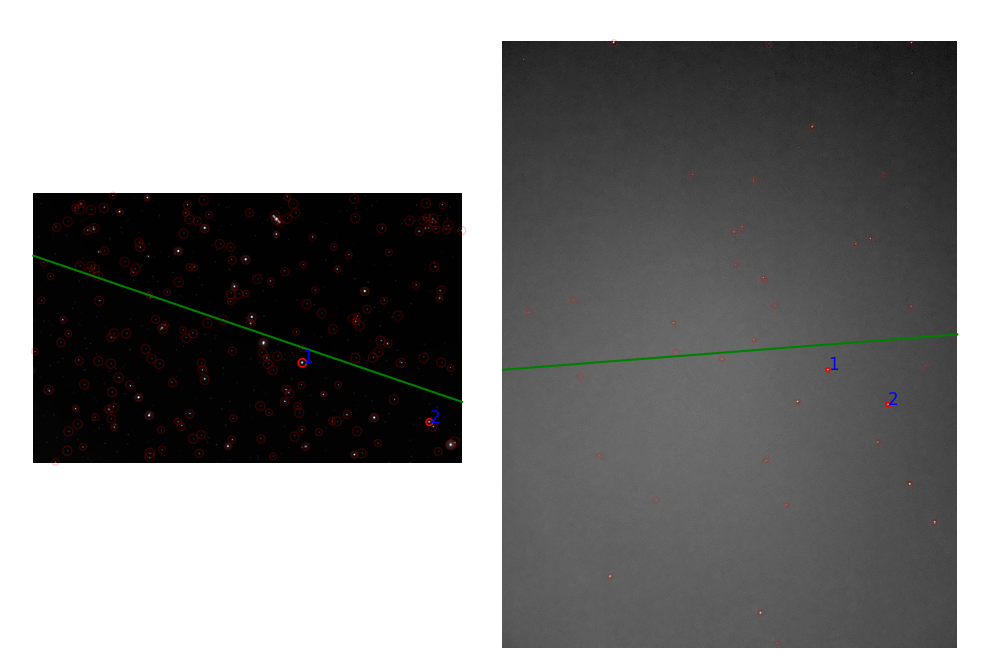

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 207
	Image2 number of feature points found: 37
Computing matches...


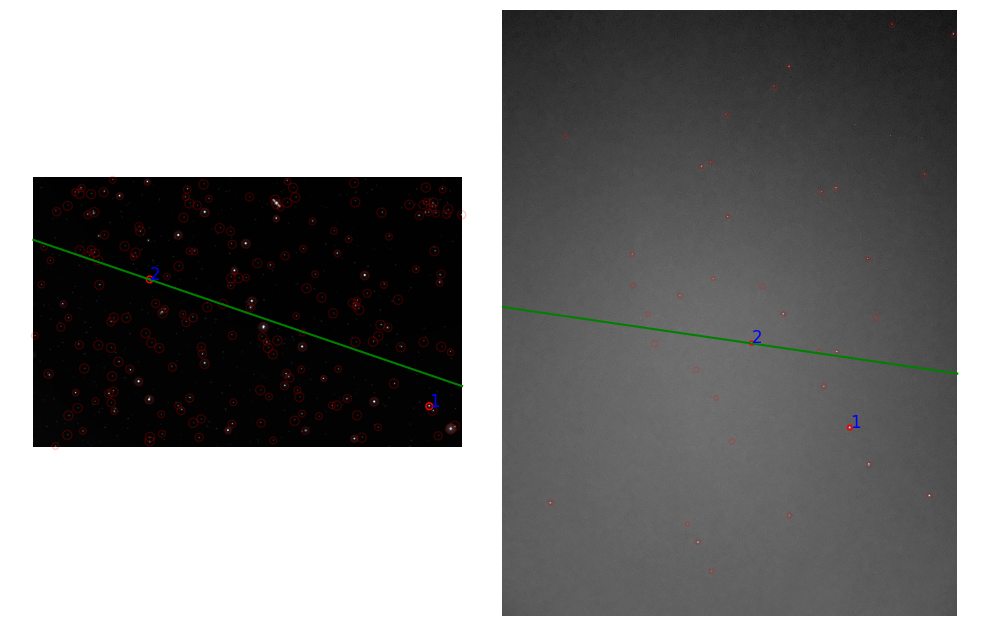

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 207
	Image2 number of feature points found: 207
Computing matches...


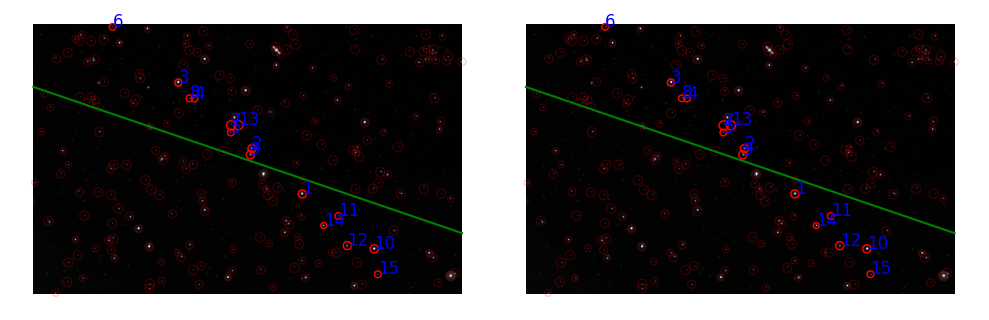

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 207
	Image2 number of feature points found: 212
Computing matches...


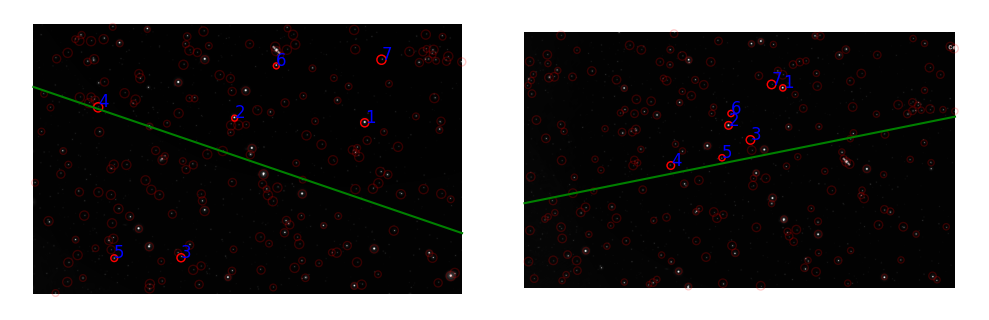

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 212
	Image2 number of feature points found: 37
Computing matches...


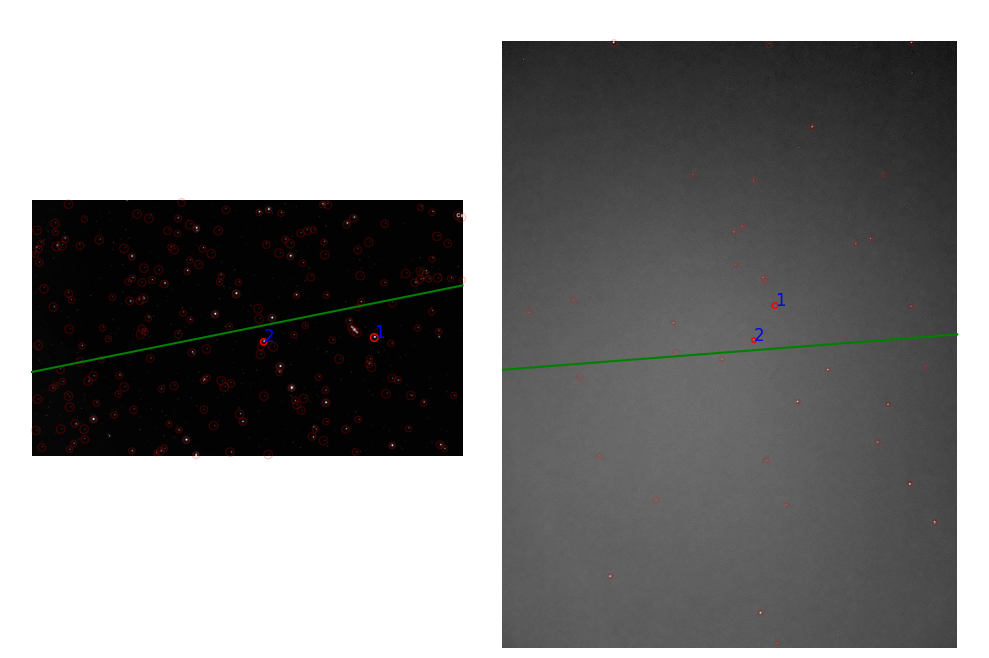

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 212
	Image2 number of feature points found: 37
Computing matches...


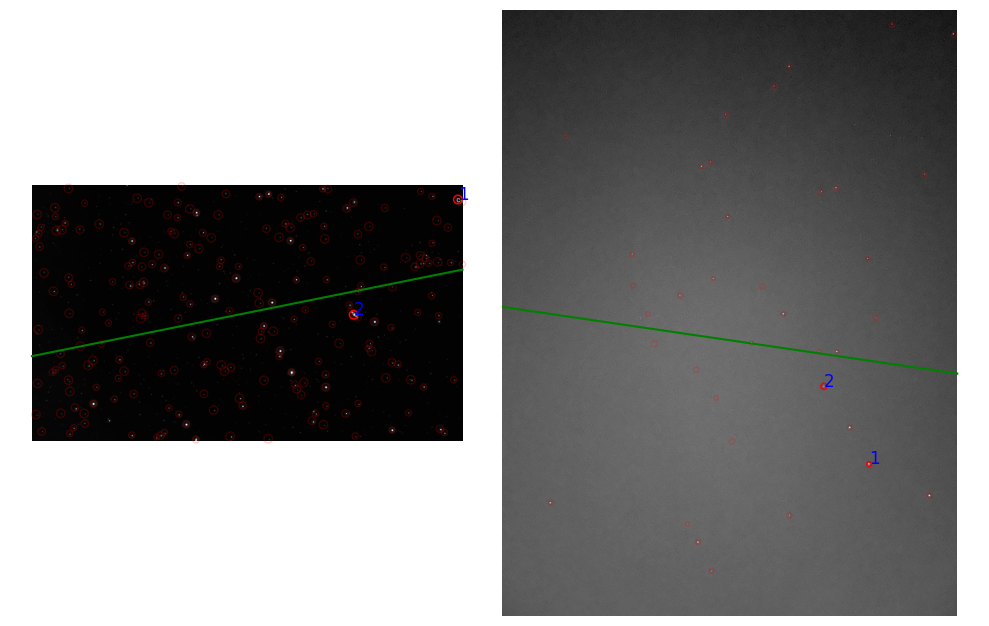

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 212
	Image2 number of feature points found: 207
Computing matches...


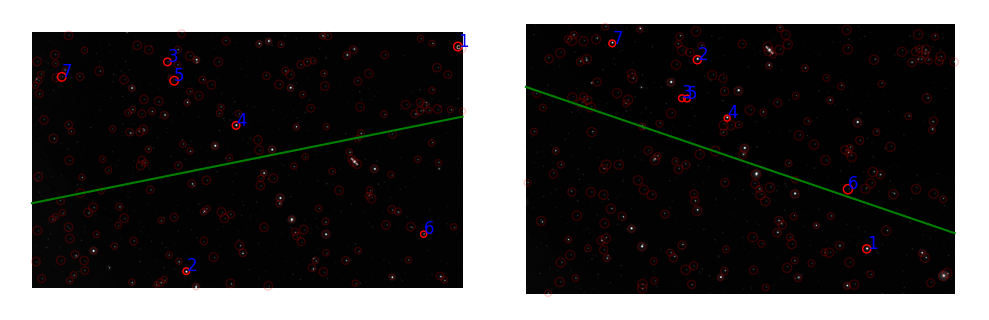

---------------------------------------------------------------------------------------------
Loaded images...
Finding feature points...
	Image1 number of feature points found: 212
	Image2 number of feature points found: 212
Computing matches...


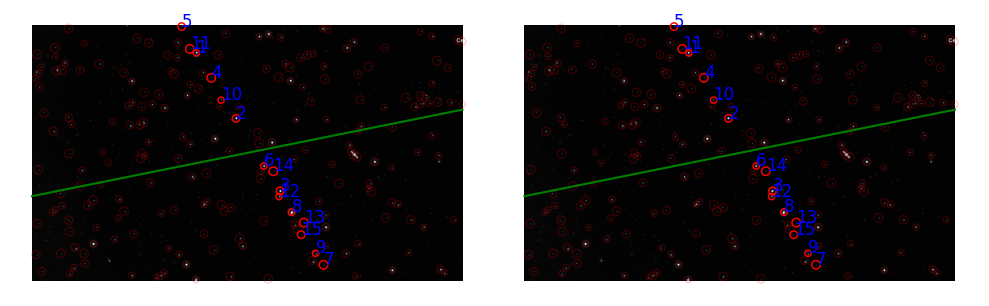

---------------------------------------------------------------------------------------------


In [3]:
for (im1_path, im2_path) in file_path_combinations:
    ##### Load the images #####
    im1 = load_image(im1_path)
    im2 = load_image(im2_path)

    print("Loaded images...")

    ##### Find feature points in each image #####
    print("Finding feature points...")
    points1, im1_data = find_stars(im1, method='hough')
    points2, im2_data = find_stars(im2, method='hough')
    print(f"\tImage1 number of feature points found: {len(points1)}\n"
          f"\tImage2 number of feature points found: {len(points2)}")

    # plot_detected_stars(im1, im1_data)
    # plot_detected_stars(im2, im2_data)

    print("Computing matches...")
    ##### Estimate Affine transformation #####
    model, L1, L2 = estimate_transformation(points1, points2, method='ransac')
    ##### Detect matches using the estimated transformation #####
    matched_points = get_star_matches(model, points1, points2)

    ##### Plot and save results #####
    ## Set n_first for readability! (Otherwise gets crowded...) ##
    plot_matches(matched_points, im1, im2, im1_data, im2_data, L1, L2, n_first=15)
    save_as_text_file(im1_data, f"data/{im1_path.split('.')[1]}.txt")
    save_as_text_file(im2_data, f"data/{im2_path.split('.')[1]}.txt")

    print("---------------------------------------------------------------------------------------------")